In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#seaborn
import seaborn as sns
# matplotlib
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Vehicle.csv")
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
data.isna().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

value counts of the features which are the object type

In [5]:
print(data.Fuel_Type.value_counts(),"\n")
print(data.Seller_Type.value_counts(),"\n")
print(data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64 

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64 

Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [6]:
#Fuel_Type ==> 1 = Petrol , 0 = Diesel , 2 = CNG
#Seller_Type ==> 1 = Manual , 0 = Automatic 
#Seller_Type ==> 1 = Dealer , 0 = Individual

data.Fuel_Type.replace(regex={"Petrol":"0","Diesel":"1","CNG":"2"},inplace=True)
data.Seller_Type.replace(regex={"Dealer":"0","Individual":"1"},inplace=True)
data.Transmission.replace(regex={"Manual":"0","Automatic":"1"},inplace=True)
data[["Fuel_Type","Seller_Type","Transmission"]]=data[["Fuel_Type","Seller_Type","Transmission"]].astype(int)

C:\Users\ompirakash s\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.05 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\ompirakash s\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.05 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\ompirakash s\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.05 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\ompirakash s\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarn

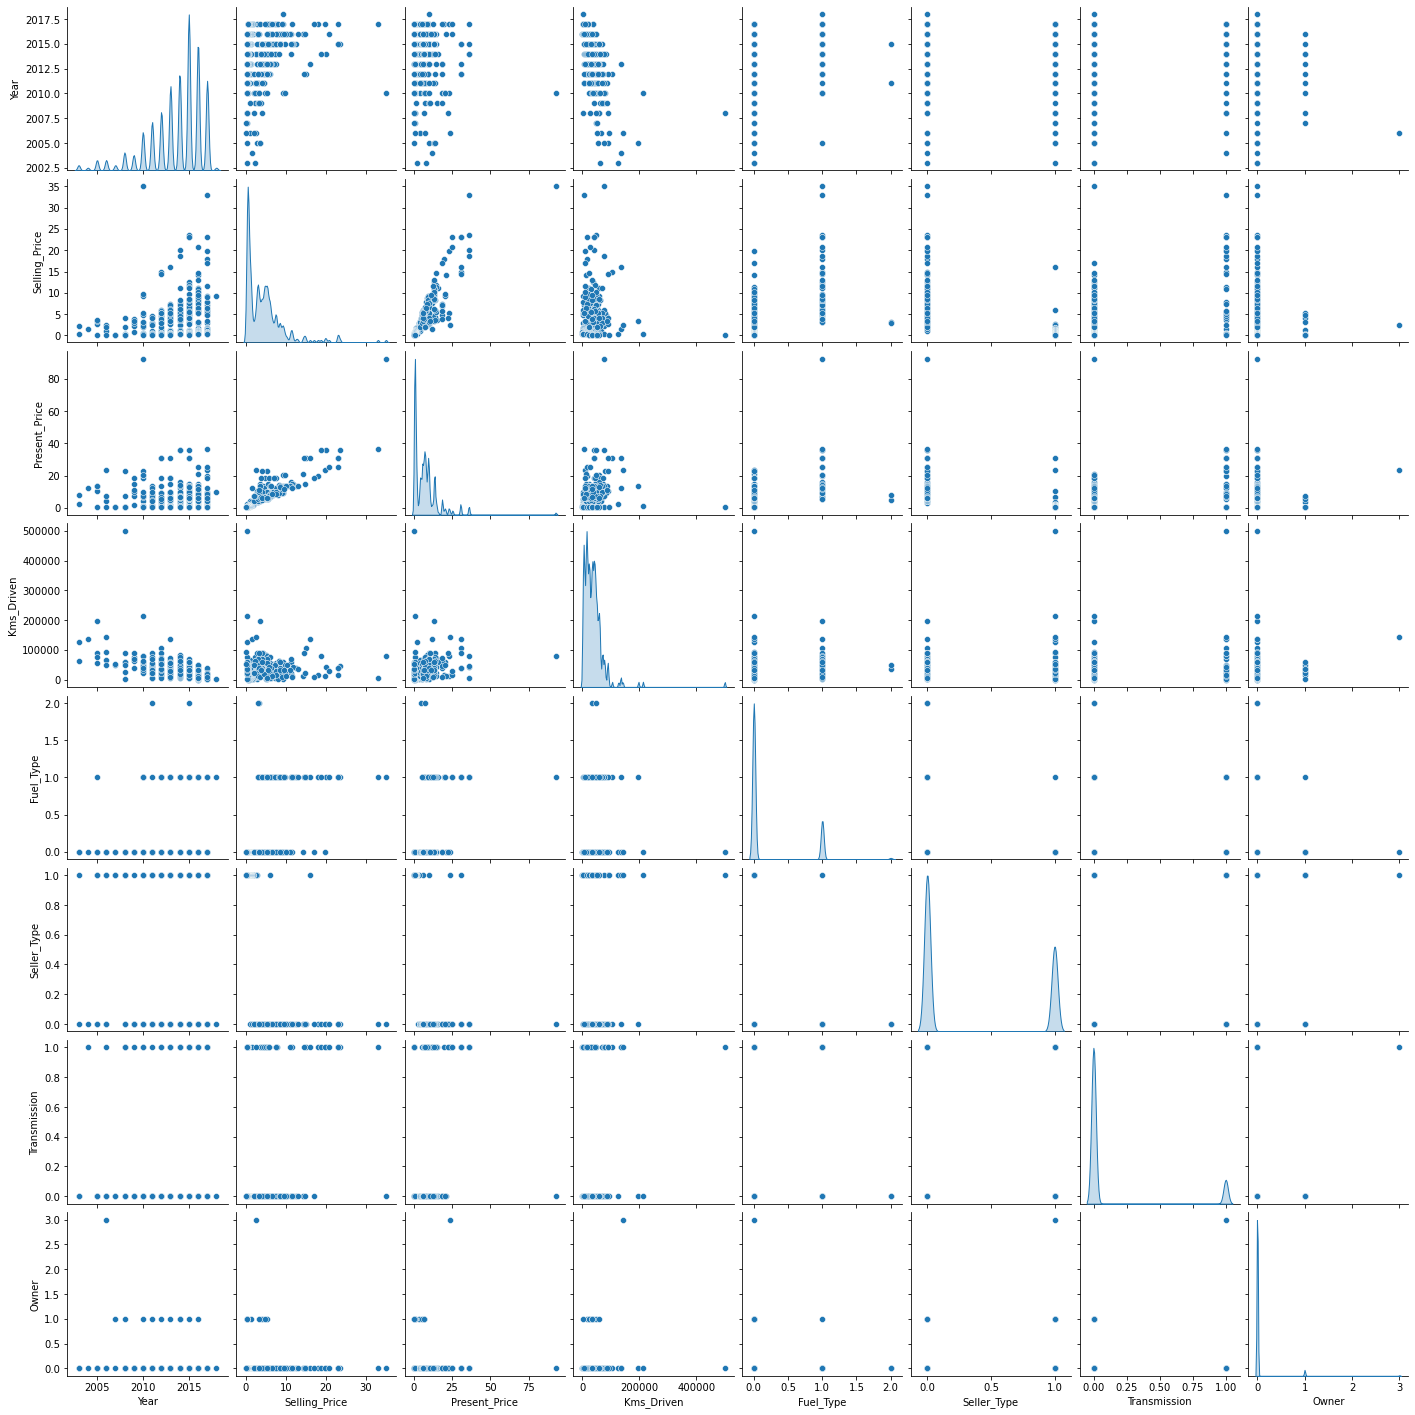

In [7]:
sns.pairplot(data,diag_kind="kde", diag_kws=dict(shade=True, bw=.05, vertical=False))
plt.show()

Applying Regression Models

In [8]:
y=data.Selling_Price
x=data.drop(["Selling_Price","Car_Name"],axis=1)

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (240, 7)
x test:  (61, 7)
y train:  (240,)
y test:  (61,)


Secondly we are going to load libraries that we need to calculate scores for regression models. Then apply function which fit the models, get the scores and plot our predictions

In [10]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [11]:
cv=5 # CV value
r_2 = [] # List for r 2 score
CV = [] # list for CV scores mean

# Main function for models
def model(algorithm,x_train_,y_train_,x_test_,y_test_): 
    algorithm.fit(x_train_,y_train_)
    predicts=algorithm.predict(x_test_)
    prediction=pd.DataFrame(predicts)
    R_2=r2_score(y_test_,prediction)
    cross_val=cross_val_score(algorithm,x_train_,y_train_,cv=cv)
    
    # Appending results to Lists 
    r_2.append(R_2)
    CV.append(cross_val.mean())
    
    # Printing results  
    print(algorithm,"\n") 
    print("r_2 score :",R_2,"\n")
    print("CV scores:",cross_val,"\n")
    print("CV scores mean:",cross_val.mean())
    
    # Plot for prediction vs originals
    test_index=y_test_.reset_index()["Selling_Price"]
    ax=test_index.plot(label="originals",figsize=(12,6),linewidth=2,color="r")
    ax=prediction[0].plot(label = "predictions",figsize=(12,6),linewidth=2,color="g")
    plt.legend(loc='upper right')
    plt.title("ORIGINALS VS PREDICTIONS")
    plt.xlabel("index")
    plt.ylabel("values")
    plt.show()

linear regression

LinearRegression() 

r_2 score : 0.8484549412090634 

CV scores: [0.89746723 0.88756505 0.83007487 0.81438137 0.75880539] 

CV scores mean: 0.8376587811920168


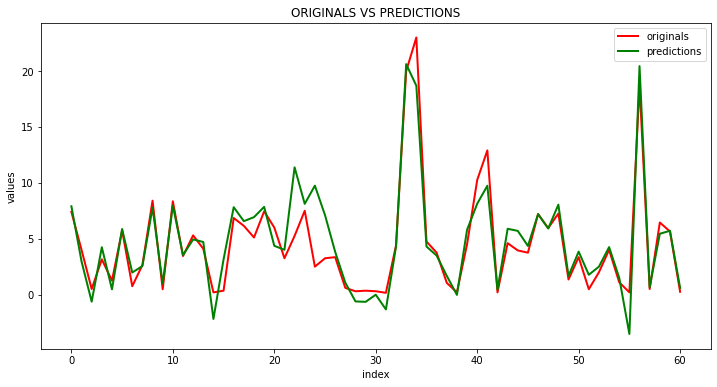

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model(lr,x_train,y_train,x_test,y_test)